In [ ]:
# EDA_4
# Assignment_EDA_4_SPOTIFY 


In [1]:
#importing the libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('spotify.csv')
df


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [9]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [10]:
df.shape

(440, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB



### Q1:  Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
### the needful?

**Insights:**
- 27 duplicated value found 
- Deleted the duplicated values 


In [13]:
df.duplicated().sum()

27

In [19]:
df = df.drop_duplicates()

In [20]:
df.duplicated().sum()

0


### Q2:  What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

**Insights:**
# Most tracks have a popularity score between 70-80, with a peak in this range.
# There are few tracks with low popularity (30-50).
# A small number of tracks have very high popularity (90-100).


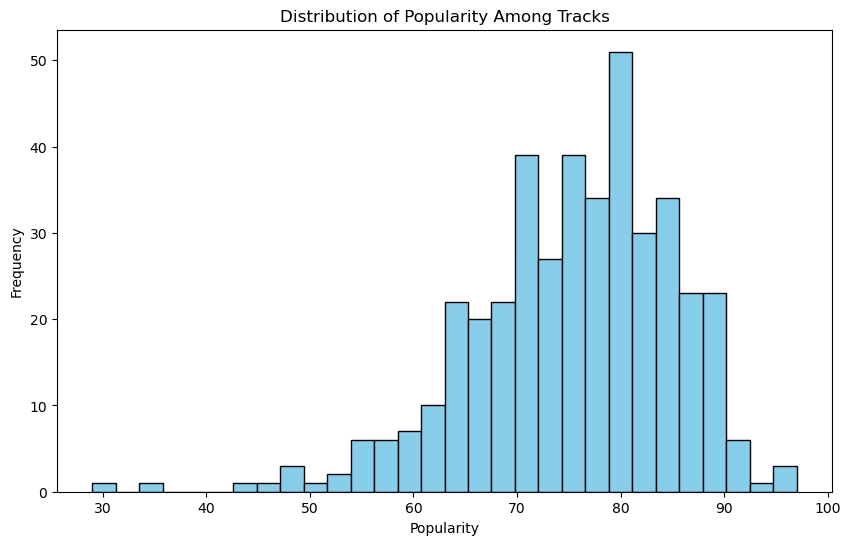

In [30]:

plt.figure(figsize=(10, 6))
df['Popularity'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Popularity Among Tracks')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()



### Q3:Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?

**Insights:**
 -  No clear relationship between popularity and duration.
 -  Both short and long tracks can have high popularity.


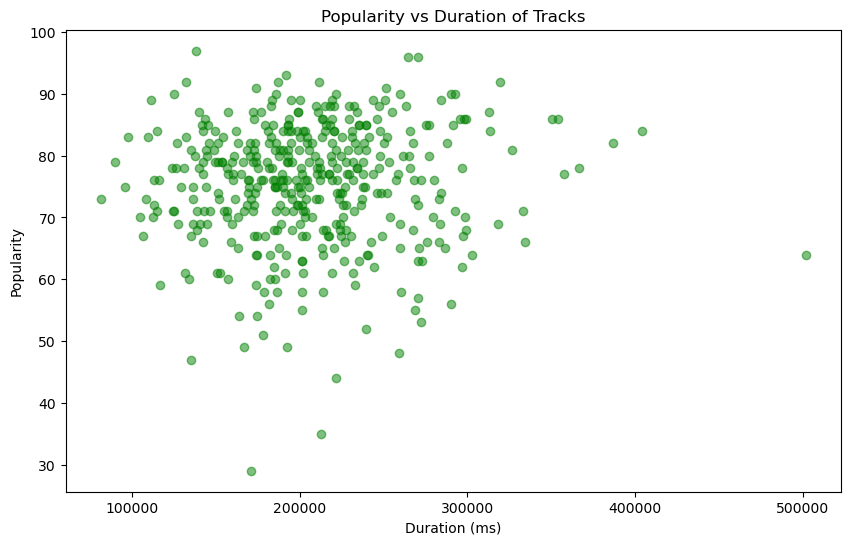

In [32]:

plt.figure(figsize=(10, 6))
plt.scatter(df['Duration (ms)'], df['Popularity'], color='green', alpha=0.5)
plt.title('Popularity vs Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()



### Q4: Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
### a countplot?

**Insights:**
- Most tracks indicate high popularity or extensive catalogs.
- More tracks suggest higher engagement potential for marketing.
- Artists with fewer tracks could offer growth opportunities


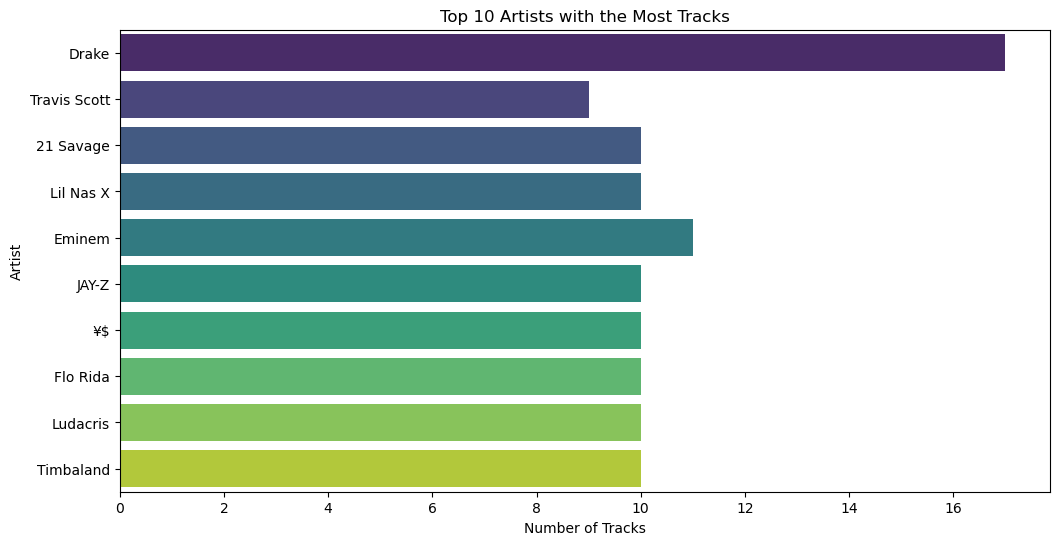

In [49]:

top_10_artists = df['Artist'].value_counts().head(10).index
top_10_df = df[df['Artist'].isin(top_10_artists)]
plt.figure(figsize=(12, 6))
sns.countplot(y='Artist', data=top_10_df, palette='viridis')
plt.title('Top 10 Artists with the Most Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()



### Q 5:  What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?

**Insights:**
- The top 5 least popular tracks are identified based on their low popularity scores.
- These tracks may need better promotion or audience targeting to increase their visibility and engagement.


In [51]:

least_popular_tracks = df.sort_values('Popularity').head(5)
least_popular_tracks[['Artist', 'Track Name', 'Popularity']]

,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48



### Q6: mong the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
### display the average popularity for each artist?

**Insights:**
- The artist with the highest average popularity will be the one that consistently ranks higher in popularity across their tracks
- This can help identify artists with strong fan engagement or those who are more consistently popular.

In [54]:

artist_avg_popularity = df.groupby('Artist')['Popularity'].mean()
top_5_artists_avg_popularity = artist_avg_popularity.sort_values(ascending=False).head(10)
artist_avg_popularity_df = artist_avg_popularity.reset_index()
artist_avg_popularity_df



,Artist,Popularity
0,*NSYNC,67.00
1,2 Chainz,72.00
2,21 Savage,83.80
3,A Boogie Wit da Hoodie,80.00
4,A$AP Ferg,69.00
...,...,...
110,Young Nudy,67.00
111,Young Thug,73.75
112,benny blanco,72.00
113,cassö,92.00



### Q7:  For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

**Insights:**
 - Artists like David Guetta,Trueno,cassö and Travis Scott dominate with more popular tracks, indicating strong fan engagement.


In [56]:

artist_avg_popularity = df.groupby('Artist')['Popularity'].mean()

top_5_artists = artist_avg_popularity.sort_values(ascending=False).head(5).index

top_artists_tracks = df[df['Artist'].isin(top_5_artists)]

most_popular_tracks = top_artists_tracks.loc[top_artists_tracks.groupby('Artist')['Popularity'].idxmax()]

most_popular_tracks[['Artist', 'Track Name', 'Popularity']]



,Artist,Track Name,Popularity
200,David Guetta,Baby Don't Hurt Me,87
30,Travis Scott,FE!N (feat. Playboi Carti),93
241,Trueno,Mamichula - con Nicki Nicole,89
140,cassö,Prada,92
260,¥$,CARNIVAL,96


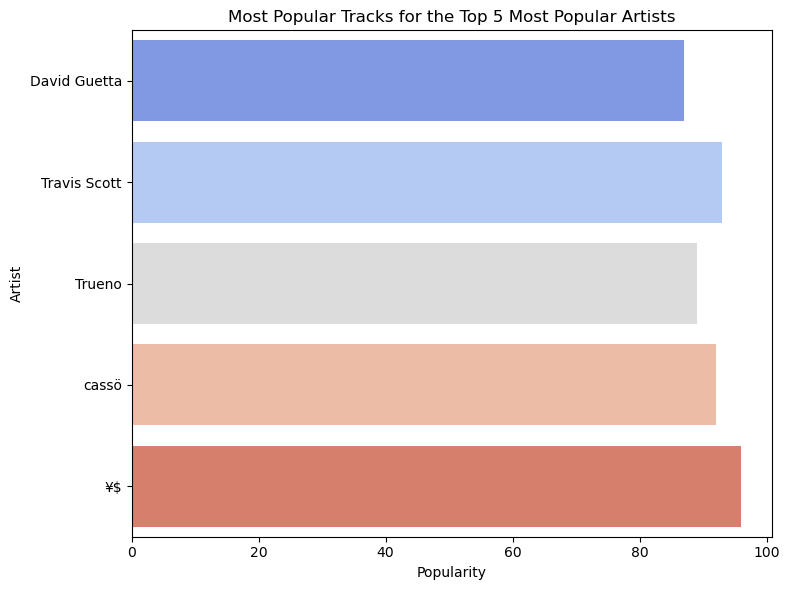

In [78]:

plt.figure(figsize=(8, 6))  
sns.barplot(x='Popularity', y='Artist', data=most_popular_tracks, palette='coolwarm')
plt.title('Most Popular Tracks for the Top 5 Most Popular Artists')
plt.xlabel('Popularity')
plt.ylabel('Artist')
plt.tight_layout()  
plt.show()



### Q 8: Visualize relationships between multiple numerical variables simultaneously using a pair plot

**Insights:**
- Correlations: Pair plots can help identify linear or non-linear relationships between variables.
- Clusters: Look for potential clusters or groupings that can give insights into track trends.
- Outliers: Any noticeable outliers may indicate anomalies or tracks with unique features.


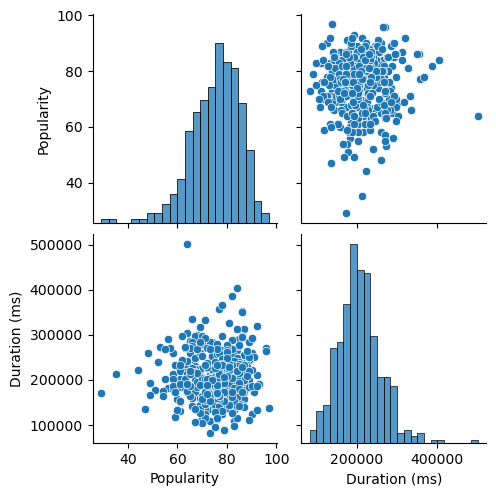

In [79]:

numerical_columns = ['Popularity', 'Duration (ms)', 'Track ID'] 
sns.pairplot(df[numerical_columns])

# Show the plot
plt.show()


### Q 9: oes the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
### violin plot?

**Insights:**
- The box plot shows the median, quartiles, and outliers in track durations per artist.
- Artists with longer boxes have more variation in track lengths.
- Artists with shorter boxes tend to produce tracks of consistent duration.


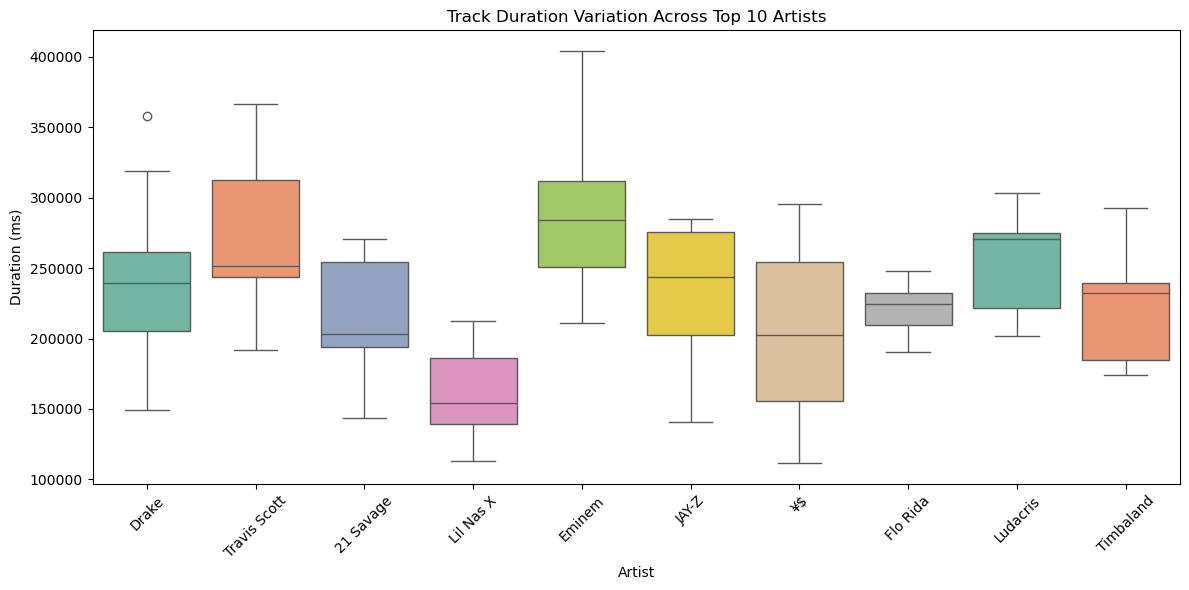

In [80]:

top_10_artists = df['Artist'].value_counts().head(10).index
filtered_df = df[df['Artist'].isin(top_10_artists)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=filtered_df, palette='Set2')

plt.title('Track Duration Variation Across Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Q 10: How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
### violin plot.
**Insights:**
-The density of points shows where most of an artist's tracks lie in terms of popularity.
- Artists with a wide spread in their points might have tracks that vary greatly in popularity.
- Artists with a tighter cluster of points may have more consistent popularity across tracks.

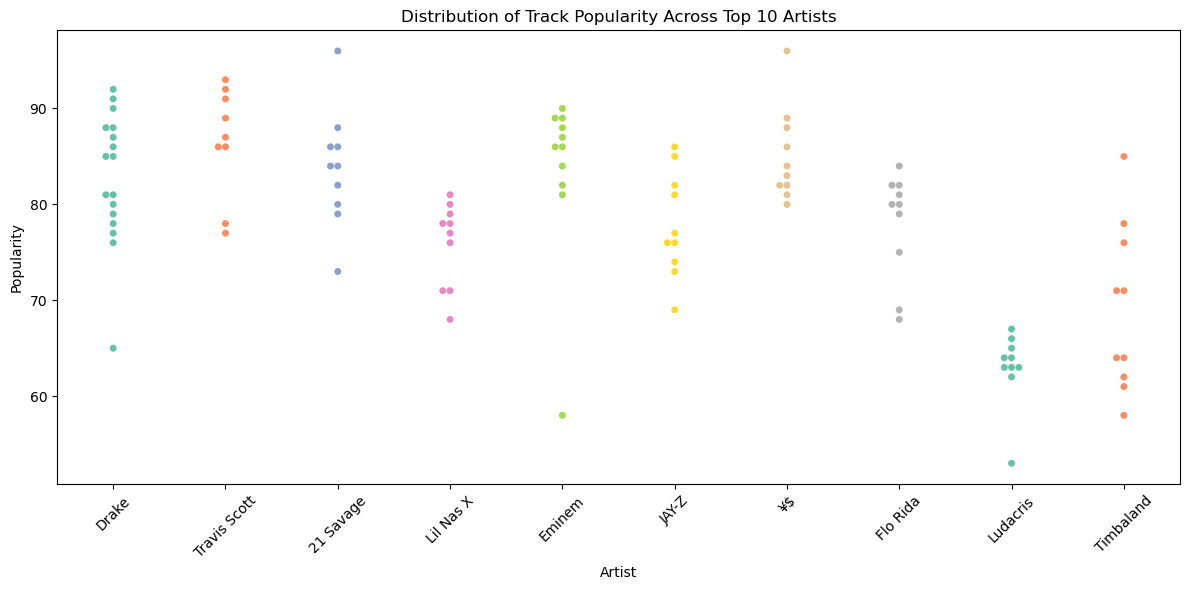

In [81]:

top_10_artists = df['Artist'].value_counts().head(10).index
filtered_df = df[df['Artist'].isin(top_10_artists)]

plt.figure(figsize=(12, 6))
sns.swarmplot(x='Artist', y='Popularity', data=filtered_df, palette='Set2')

plt.title('Distribution of Track Popularity Across Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Exploratory Data Analysis (EDA) Summary 

Q1: Read the dataframe, check null values if present then do the needful, check duplicate rows, if present then do the needful?

    Insights:

        27 duplicated values were found.

        These duplicated values were removed.

Q2: What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

    Insights:

        Most tracks have a popularity score between 70-80, with a peak in this range.

        A few tracks have lower popularity (30-50).

        A small number of tracks have very high popularity (90-100).

Q3: Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?

    Insights:

        No clear relationship between popularity and duration.

        Both short and long tracks can have high popularity.

Q4: Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a count plot?

    Insights:

        Most tracks indicate high popularity or extensive catalogs.

        Artists with more tracks have higher engagement potential for marketing.

        Artists with fewer tracks may offer growth opportunities.

Q5: What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?

    Insights:

        The top 5 least popular tracks are identified based on their low popularity scores.

        These tracks may need better promotion or audience targeting to increase their visibility and engagement.

Q6: Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist?

    Insights:

        The artist with the highest average popularity consistently ranks higher in popularity across their tracks.

        This can help identify artists with strong fan engagement or those more consistently popular.

Q7: For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist?

    Insights:

        Artists like David Guetta, Trueno, cassö, and Travis Scott dominate with more popular tracks, indicating strong fan engagement.

Q8: Visualize relationships between multiple numerical variables simultaneously using a pair plot.

    Insights:

        Correlations: Pair plots help identify linear or non-linear relationships between variables.

        Clusters: Look for clusters or groupings that can give insights into track trends.

        Outliers: Any noticeable outliers may indicate anomalies or tracks with unique features.

Q9: Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot?

    Insights:

        The box plot shows the median, quartiles, and outliers in track durations per artist.

        Artists with longer boxes have more variation in track lengths.

        Artists with shorter boxes tend to produce tracks of consistent duration.

Q10: How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot?

    Insights:

        The density of points shows where most of an artist's tracks lie in terms of popularity.

        Artists with a wide spread in their points might have tracks that vary greatly in popularity.

        Artists with a tighter cluster of points may have more consistent popularity across tracks.